In [137]:
#import sys  
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install sklearn
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install plotly
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

import seaborn as sns

import os  # para obter nome da pasta
import matplotlib.gridspec as gridspec #para layout das figuras

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import median_absolute_error

from scipy import interpolate

folder='no_combination/'
# folder='D:\home\user\Documentos\Astronomia\kepler\c13\photometry\k2sc_pdc_plot\k2sc_corte\lc_clean_ivs_criterios\\no_combination\\'
folder2='only_combination/'
# folder='D:\home\user\Documentos\Astronomia\kepler\c13\photometry\k2sc_pdc_plot\k2sc_corte\lc_clean_ivs_criterios\\only_combination\\'
# spb  = 210853356, 246704649, 246968117, 247131891, 247147476, 247153152, 247164195,
#        247169098, 247234723, 247264203, 247745384, 247757517, 247889905, 248064520,
#        248150769, 248227339.

# le tabela lambda_mm(s), m=1 
lambda_mm_s=np.loadtxt('lambda_me1.txt')
lambda_mm_s_interpo = interpolate.InterpolatedUnivariateSpline(lambda_mm_s[:,0], lambda_mm_s[:,1])

name=['247745384']
resultado_pw_no_combination=np.load(folder+name[0]+'_no_combination.npy')
resultado_pw_only_combination=np.load(folder2+name[0]+'_only_combination.npy')
all_data=pd.DataFrame(np.append(resultado_pw_no_combination,resultado_pw_only_combination))

freq_ivs_only_combination=resultado_pw_only_combination['freq']#[np.where(resultado_pw['freq']>0.04)]
freq_ivs_no_combination=resultado_pw_no_combination['freq']
freq_ivs_all_dia=all_data['freq']
freq_ivs_og=np.copy(freq_ivs_all_dia)
px.scatter(freq_ivs_all_dia*1000000/(3600*24))

In [138]:
resultado_pw_no_combination

array([(0., 1515.57748354,  0.11741684, -0.123582  , 0., 259.34532026, 0.00131328, 0.1711198 ,  9.35354831),
       (0., 2569.62332049,  0.13991187,  0.28776902, 0., 321.04728722, 0.00095886, 0.12493944, 15.9253826 ),
       (0., 2099.85860736,  0.15997087,  0.35199683, 0., 297.30505759, 0.0010866 , 0.14158337, 11.81283701),
       (0.,  435.13889962,  0.30563178,  0.27662927, 0., 114.30055109, 0.00201593, 0.26267601,  4.12921385),
       (0.,  445.61374047,  1.41629623,  0.13945303, 0., 125.84785062, 0.00216742, 0.28241465,  4.09465703),
       (0.,  880.13755774,  1.48124786, -0.21532534, 0., 196.18502187, 0.00171069, 0.22290268,  6.42317061),
       (0., 1115.42747507,  1.51969543,  0.07473348, 0., 218.71058172, 0.00150482, 0.19607781,  7.52187482),
       (0.,  713.07925983,  1.56707978, -0.34368524, 0., 173.86436703, 0.00187124, 0.24382194,  5.54427193),
       (0.,  447.43430143,  1.59297134, -0.43416749, 0., 130.17408018, 0.00223281, 0.29093451,  4.10749732),
       (0.,  705.74

In [193]:
freq_ivs_all_dia=freq_ivs_og[0:40]

dia_para_microhertz=1000000/(3600*24)

erro_freq=np.append(resultado_pw_only_combination['e_freq'],resultado_pw_no_combination['e_freq'])
erro_freq=dia_para_microhertz*np.argsort(freq_ivs_all_dia)
# freq_ivs_all_dia=np.sort(freq_ivs_all_dia[freq_ivs_all_dia<50])

freq_ivs_all=dia_para_microhertz*np.sort(freq_ivs_all_dia)

delta_k_nu_freq_ivs_all=np.zeros(len(freq_ivs_all)-1)
kmedio_freq_ivs_all=np.zeros(len(freq_ivs_all)-1)
indice=np.zeros(len(freq_ivs_all)-1)
for i in range(1, len(freq_ivs_all)):
    indice[i-1]=i-1
    delta_k_nu_freq_ivs_all[i-1]=freq_ivs_all[i]-freq_ivs_all[i-1]
    kmedio_freq_ivs_all[i-1]=(freq_ivs_all[i]+freq_ivs_all[i-1])/2.0
sqr_delta_k_all=np.sqrt(delta_k_nu_freq_ivs_all)


b=-0.56
a=0.088
x_est = np.linspace(0,25,100)
y_est = a*x_est+b
fig = px.scatter(x=kmedio_freq_ivs_all, y=sqr_delta_k_all,hover_data=[indice])
# fig.update_xaxes(range=[5,25])
# fig.update_yaxes(range=[-0.2, 1.4])
fig.show()

In [195]:
m1_loca=[0,40]
#m1_loca=[0,10]
# m2_loca=[65,-1]


In [197]:
base=[0,2,3,4,10,17,18,20]
#base=[22,25,28,32]
base_multi=3
# base=[13,14,16,18]
kmedio_l1=kmedio_freq_ivs_all[np.array(base)]
sqr_delta_k_l1=sqr_delta_k_all[np.array(base)]
sqr_delta_k_l1og=np.copy(sqr_delta_k_l1)


kmedio_mi=kmedio_freq_ivs_all[m1_loca[0]:m1_loca[1]]
sqr_delta_k_mi=sqr_delta_k_all[m1_loca[0]:m1_loca[1]]

In [198]:
kmedio_l1

array([ 1.48917077,  2.35878012,  3.06260382,  3.39828351, 17.86328246,
       41.76187132, 46.9877442 , 57.63830385])

0.659644588948581


(0.0, 1.3)

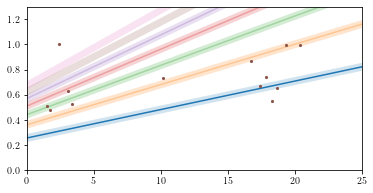

In [199]:

# fit a linear curve an estimate its y-values and their error.
sqr_delta_k_l1=sqr_delta_k_l1og/np.sqrt(base_multi)
a, b = np.polyfit(kmedio_l1, sqr_delta_k_l1, deg=1)

a_inicial=np.copy(a)
b_inicial=np.copy(b)

x=kmedio_l1

x_est = np.linspace(0,35,100)
y_est0 = a*x_est+b

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(x_est, y_est0, '-')
ax.plot(x_est, y_est0*np.sqrt(2), '-',alpha=0.3)
ax.plot(x_est, y_est0*np.sqrt(3), '-',alpha=0.3)
ax.plot(x_est, y_est0*np.sqrt(4), '-',alpha=0.3)
ax.plot(x_est, y_est0*np.sqrt(5), '-',alpha=0.3)
ax.plot(kmedio_mi, sqr_delta_k_mi, 'o', color='tab:brown',markersize=2.1)
y_est = a*x+b
quantos_sigmas=3
y_err=quantos_sigmas*median_absolute_error(sqr_delta_k_l1, y_est)
print(y_err)
y_err=0.032

ax.fill_between(x_est, y_est0 - y_err, y_est0 + y_err, alpha=0.2)
ax.fill_between(x_est, (y_est0*np.sqrt(2) - y_err), (y_est0*np.sqrt(2) + y_err), alpha=0.2)
ax.fill_between(x_est, (y_est0*np.sqrt(3) - y_err),( y_est0*np.sqrt(3) + y_err), alpha=0.2)
ax.fill_between(x_est, (y_est0*np.sqrt(4) - y_err), (y_est0*np.sqrt(4) + y_err), alpha=0.2)
ax.fill_between(x_est, (y_est0*np.sqrt(5) - y_err), (y_est0*np.sqrt(5) + y_err), alpha=0.2)
ax.fill_between(x_est, (y_est0*np.sqrt(6) - y_err), (y_est0*np.sqrt(6) + y_err), alpha=0.2)
ax.fill_between(x_est, (y_est0*np.sqrt(7) - y_err), (y_est0*np.sqrt(7) + y_err), alpha=0.2)

ax.set_xlim(0,25)
ax.set_ylim(0,1.3)

In [200]:
kmedio_transladado=np.copy(kmedio_mi)
sqr_delta_k_transladado=np.copy(sqr_delta_k_mi)
delta_n=[1,2,3,4,5,6,7,8]
# i=0
for delta_N in delta_n:
#     i=i+1
    a_i=a*np.sqrt(delta_N)
    b_i=np.copy(b)*np.sqrt(delta_N)
    xp=np.copy(kmedio_transladado)
    yp=np.copy(sqr_delta_k_transladado)
    Distance = (np.absolute(a_i*xp - yp + b_i)) / (np.sqrt( a_i*a_i + 1))
    y_erro_i=(1-0.1*(delta_N-1))*y_err
    sqr_delta_k_transladado[np.where(Distance<y_erro_i)]=sqr_delta_k_transladado[np.where(Distance<y_erro_i)]/np.sqrt(delta_N)
xp=np.copy(kmedio_transladado)
yp=np.copy(sqr_delta_k_transladado)    
Distance_reta0 = (np.absolute(a*xp - yp + b)) / (np.sqrt( a*a + 1))
kmedio_l2=kmedio_transladado[np.where(Distance_reta0<y_err)]
sqr_delta_k_l2=sqr_delta_k_transladado[np.where(Distance_reta0<y_err)]
pontos_reta=np.where(Distance_reta0<y_err)

a0, b0 = np.polyfit(kmedio_l2, sqr_delta_k_l2, deg=1)

In [202]:
f_i=1
for i in range(4):
#for i in range(7):
    m=1
    x = kmedio_l2/m
#     print(len(x))
    y = f_i*(sqr_delta_k_l2/np.sqrt(m))

    # fit a linear curve an estimate its y-values and their error.
    a, b = np.polyfit(x, y, deg=1)
    delta_k_nu=sqr_delta_k_mi*sqr_delta_k_mi
    kmedio=kmedio_mi
    nu_rot=-b/a
    P0=a*a
    print('inter ',i,', nu_rot = ',nu_rot,' , P0= ', 1000*P0)


    nu_co=freq_ivs_all[m1_loca[0]:m1_loca[1]+1]-m*nu_rot

    s=2*nu_rot/nu_co

    f_i=np.empty(len(nu_co)-1)
    for k in range(len(nu_co)-1):
#         deltak_sqrLmm_over_nu_co=((m+m*lambda_mm_s_interpo(s[k+1]))/nu_co[k+1])-((m+m*lambda_mm_s_interpo(s[k]))/nu_co[k])
#         f_k=(kmedio-nu_rot)*np.sqrt(-1*deltak_sqrLmm_over_nu_co/(delta_k_nu[k]*m))
#         f_i[k]=f_k
        deltak_sqrLmm_over_nu_co=((m+m*lambda_mm_s_interpo(s[k+1]))/nu_co[k+1])-((m+m*lambda_mm_s_interpo(s[k]))/nu_co[k])
        f_k=(kmedio[k]-m*nu_rot)*np.sqrt(-1*deltak_sqrLmm_over_nu_co/(delta_k_nu[k]*m))
#         print(-1*deltak_sqrLmm_over_nu_co/(delta_k_nu[k]*m))

        f_i[k]=f_k
    
       
    f_i=f_i[pontos_reta]
#     print(f_i) 

inter  0 , nu_rot =  -11.228762883908665  , P0=  0.5117102919034451
inter  1 , nu_rot =  nan  , P0=  nan
inter  2 , nu_rot =  nan  , P0=  nan
inter  3 , nu_rot =  nan  , P0=  nan


/home/user/jupyter_projects/jupyter_projects/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning:

invalid value encountered in sqrt



/home/user/jupyter_projects/jupyter_projects/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/user/jupyter_projects/jupyter_projects/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/user/jupyter_projects/jupyter_projects/lib/python3.7/site-pack

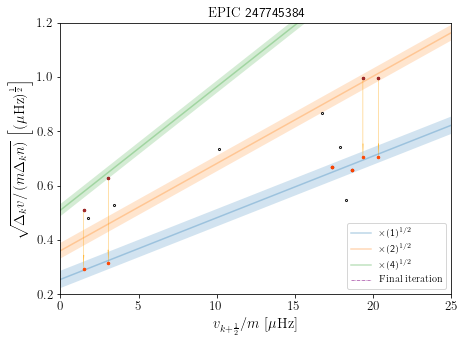

In [203]:
import math

# fit a linear curve an estimate its y-values and their error.
a1, b1 = np.polyfit(kmedio_l2, sqr_delta_k_l2, deg=1)

x=np.copy(kmedio_l2)

x_est = np.linspace(0,25,100)
y_est0 = a_inicial*x_est+b_inicial
y_primeiro_chute = a_inicial*x_est+b_inicial


fig, ax = plt.subplots(figsize=(7,5))
# ax.plot(x_est, y_est0, '-')
delta_n=[1,2,4]
#delta_n=[1,2,3,4,5,6,7,8]
for delta_N in delta_n:
    ax.plot(x_est, y_est0*np.sqrt(delta_N), '-',alpha=0.3, label=r'$\times ($'+np.str(delta_N)+r'$)^{{1}/{2}}$')
    #ax.plot(x_est, y_est0*np.sqrt(delta_N), '-',alpha=0.3, label= r'$\times $'+np.str(delta_N))

for i in range(len(kmedio_mi)):
    ax.arrow(kmedio_mi[i], sqr_delta_k_mi[i], (kmedio_mi-kmedio_mi)[i]
             , (sqr_delta_k_transladado-sqr_delta_k_mi)[i],width=0.01,head_width=0.05,lw=0.1
             ,head_length=0.05,length_includes_head=True,color='orange')
    
ax.plot(kmedio_mi, sqr_delta_k_mi, 'o', color='black',markersize=2.1,fillstyle='none',alpha=0.9)
ax.plot(kmedio_mi[pontos_reta], sqr_delta_k_mi[pontos_reta], 'o', color='brown',markersize=2.5)
ax.plot(kmedio_mi[pontos_reta], sqr_delta_k_transladado[pontos_reta], 'o', color='orangered',markersize=2.5)


y_est = a1*x+b1

y_inicial = a1*x_est+b1
y_final = a*x_est+b

# ax.plot(x_est, y_inicial, '-',alpha=0.3, label='x'+np.str(delta_N))
# print(a,a1,a0,b,b1,b0)
# y_err=quantos_sigmas*median_absolute_error(sqr_delta_k_l2, y_est)
# delta_n=[1,2,3,4,5,6,7,8]
i=0
for delta_N in delta_n:
    i=i+1
    y_erro_i=(1-0.1*(delta_N-1))*y_err
    ax.fill_between(x_est, (y_est0*np.sqrt(delta_N) - y_erro_i), (y_est0*np.sqrt(delta_N) + y_erro_i), alpha=0.2)
ax.plot(x_est, y_final, '-.', label=r'$\mathrm{Final \ iteration}$',color='purple',linewidth=0.5)
ax.fill_between(x_est, (0*y_est0), (y_est0 - 6*y_erro_i), alpha=1.0,color='w',zorder=2.3)
ax.fill_between(x_est, (3*y_est0+1*y_erro_i), (200*y_est0 + 6*y_erro_i), alpha=1.0,color='w',zorder=2.3)

ax.set_xlim(0,25)
ax.set_ylim(0.2,1.2)
ax.set_title(r'$\mathrm{EPIC} \ $' + name[0], fontsize=13.5)
ax.set_xlabel(r'$v_{k+\frac{1}{2}} / m$  $[\mu \mathrm{Hz}]$', fontsize=14.5)
ax.set_ylabel(r'$\sqrt{\Delta_{k} v /\left(m \Delta_{k} n\right)}$  $\left[(\mu \mathrm{Hz})^{\frac{1}{2}}\right]$', fontsize=14.5)
#ax.legend(loc='upper right')
ax.legend(loc='lower right')
# change the fontsize
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
#plt.savefig(np.str(name[0]+'.png'),format='png',dpi=500)
plt.savefig(np.str(name[0]+'.pdf'),format='pdf')